In [2]:
import pandas as pd

#load data

billing = pd.read_csv("billing.csv")
doctors = pd.read_csv("doctors.csv")
appointments = pd.read_csv("appointments.csv")
patients = pd.read_csv("patients.csv")
treatments = pd.read_csv("treatments.csv")

#tampilan

print("Billing")
print(billing.head())

print("Doctors")
print(doctors.head())

print("Appointments")
print(appointments.head())

print("Patients")
print(patients.head())

print("Treatments")
print(treatments.head())


Billing
  bill_id patient_id treatment_id   bill_date   amount payment_method  \
0    B001       P034         T001  2023-08-09  3941.97      Insurance   
1    B002       P032         T002  2023-06-09  4158.44      Insurance   
2    B003       P048         T003  2023-06-28  3731.55      Insurance   
3    B004       P025         T004  2023-09-01  4799.86      Insurance   
4    B005       P040         T005  2023-07-06   582.05    Credit Card   

  payment_status  
0        Pending  
1           Paid  
2           Paid  
3         Failed  
4        Pending  
Doctors
  doctor_id first_name last_name specialization  phone_number  \
0      D001      David    Taylor    Dermatology    8322010158   
1      D002       Jane     Davis     Pediatrics    9004382050   
2      D003       Jane     Smith     Pediatrics    8737740598   
3      D004      David     Jones     Pediatrics    6594221991   
4      D005      Sarah    Taylor    Dermatology    9118538547   

   years_experience   hospital_branch   

=== Statistik Dasar ===
            amount         cost
count   200.000000   200.000000
mean   2756.249250  2756.249250
std    1298.125308  1298.125308
min     534.030000   534.030000
25%    1563.412500  1563.412500
50%    2828.165000  2828.165000
75%    3836.627500  3836.627500
max    4973.630000  4973.630000

=== Regresi Linier ===
Persamaan: amount = -0.00 + 1.00 * cost
R²: 1.00


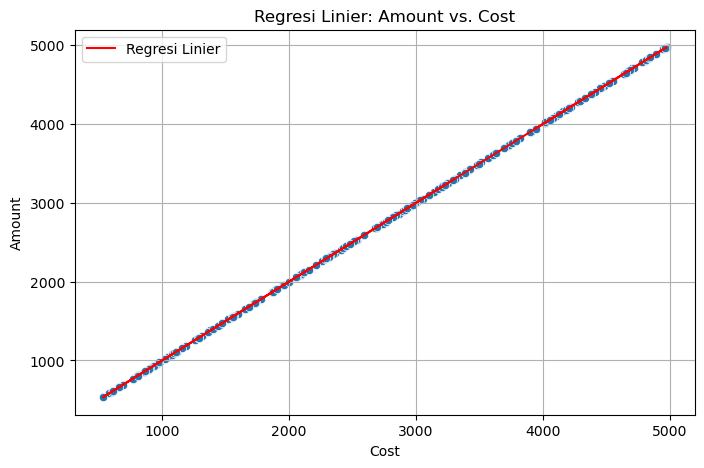

In [15]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

# Load data (ganti path sesuai file lokal kamu)
billing = pd.read_csv("billing.csv")
treatments = pd.read_csv("treatments.csv")

# Gabungkan data
df = pd.merge(billing, treatments, on='treatment_id')

# Statistika dasar
print("=== Statistik Dasar ===")
print(df[['amount', 'cost']].describe())

# Regresi linier
X = df[['cost']]
y = df['amount']
model = LinearRegression()
model.fit(X, y)

print("\n=== Regresi Linier ===")
print(f"Persamaan: amount = {model.intercept_:.2f} + {model.coef_[0]:.2f} * cost")
print(f"R²: {model.score(X, y):.2f}")

# Visualisasi
plt.figure(figsize=(8, 5))
sns.scatterplot(x='cost', y='amount', data=df)
plt.plot(df['cost'], model.predict(X), color='red', label='Regresi Linier')
plt.xlabel("Cost")
plt.ylabel("Amount")
plt.title("Regresi Linier: Amount vs. Cost")
plt.legend()
plt.grid(True)
plt.show()
